# Proyek Analisis Data: E-Commerce Public dataset
- Nama: Yordan Saputra
- Email: 22053025@student.uwp.ac.id
- Id Dicoding: jordanz157 

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana tingkat kepuasan pelanggan saat ini ?
- pertanyaan 2 : Kategori produk mana yang mengalami peningkatan penjualan signifikan?

## Menyiapkan semua library yang dibutuhkan

In [171]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
customers_df=pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
orderss_df = pd.read_csv("orders_dataset.csv")
orderss_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
product_category_name_translation_df = pd.read_csv("product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Menilai Tabel Customers

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [74]:
print("Jumlah duplikasi customer unique id : ",customers_df["customer_unique_id"].duplicated().sum())
customers_df.describe()

Jumlah duplikasi customer unique id :  3345


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai Tabel Order Item

In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Seharusnya shipping_limit_date bertipe date time

In [15]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [42]:
print("Jumlah data penggabung:",len(order_items_df.index))
display(order_items_df.head())

Jumlah data order penggabung: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [109]:
print("Jumlah duplikat order id: ",order_items_df['order_id'].duplicated().sum())

Jumlah duplikat order id:  0


In [110]:
print("Jumlah duplikat order id: ",order_items_df['product_id'].duplicated().sum())

Jumlah duplikat order id:  0


Menilai Tabel Order payments

In [18]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [64]:
print("jumlah data order payments:",len(order_payments_df.index))

jumlah data order payments: 103886


In [116]:
print("Jumlah duplikat order id: ",order_payments_df['order_id'].duplicated().sum())

Jumlah duplikat order id:  4446


Menilai Order Reviews

In [118]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Seharusnya review_creation_date dan review_answer_timestamp bertipe date time

In [27]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [70]:
print("jumlah data order review:",len(order_reviews_df.index))

jumlah data order review: 99224


In [72]:
print("Jumlah duplikat review id : ",order_reviews_df['review_id'].duplicated().sum())

Jumlah duplikat review id :  814


In [73]:
print("Jumlah duplikat order id : ",order_reviews_df['order_id'].duplicated().sum())

Jumlah duplikat review id :  551


In [38]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai Tabel Orders

In [46]:
orderss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
Seharusnya data bertipe date time yaitu : 
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

In [48]:
orderss_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [78]:
print("Jumlah data orderan :",len(orderss_df.index))

Jumlah data orderan : 99441


In [75]:
print("Jumlah duplikasi: ",orderss_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai Tabel product category name translation

In [55]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [80]:
print("Jumlah duplikasi: ",product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Menilai Tabel Products

In [84]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [85]:
print("jumlah data produk:",len(products_df.index))

jumlah data produk: 32951


In [86]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Menilai Tabel sellers

In [61]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Membersihkan Data Customers

Membersihkan duplikat data

In [91]:
customers_df.drop_duplicates(inplace=True, subset=['customer_unique_id'])
print("Jumlah duplikasi customer unique id : ",customers_df["customer_unique_id"].duplicated().sum())

Jumlah duplikasi customer unique id :  0


Memperbaiki Data order items

Penyesuaian tipe data date time

In [93]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], format='mixed')

In [95]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Membersihkan duplikat order id dan product id

In [112]:
order_items_df.drop_duplicates(subset=['order_id'], inplace=True)
print("Jumlah duplikasi order id : ", order_items_df["order_id"].duplicated().sum())
order_items_df.drop_duplicates(subset=['product_id'], inplace=True)
print("Jumlah duplikasi product id : ", order_items_df["product_id"].duplicated().sum())

Jumlah duplikasi order id :  0
Jumlah duplikasi product id :  0


Memperbaiki Data order payment

In [ ]:
Membersihkan duplikat order id

In [117]:
order_payments_df.drop_duplicates(subset=['order_id'], inplace=True)
print("Jumlah duplikasi order id : ", order_payments_df["order_id"].duplicated().sum())

Jumlah duplikasi order id :  0


Memperbaiki Data order review

Penyesuaian tipe data date time

In [120]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [121]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Drop data Null yang memiliki value pada order reviews

In [123]:
order_reviews_df.dropna(axis=0, inplace=True, subset=['review_comment_title','review_comment_message'])
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Membersihkan data duplikat review id dan order id

In [125]:
order_reviews_df.drop_duplicates(subset=['review_id'], inplace=True)
print("Jumlah duplikasi review id : ", order_reviews_df["review_id"].duplicated().sum())

Jumlah duplikasi review id :  0


In [126]:
order_reviews_df.drop_duplicates(subset=['order_id'], inplace=True)
print("Jumlah duplikasi order id : ", order_reviews_df["order_id"].duplicated().sum())

Jumlah duplikasi order id :  0


Menggabung tabel item dengan penggabungan tabel order dan products

In [96]:
products_order_item_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

In [97]:
products_order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   product_id                  112650 non-null  object        
 1   product_category_name       111047 non-null  object        
 2   product_name_lenght         111047 non-null  float64       
 3   product_description_lenght  111047 non-null  float64       
 4   product_photos_qty          111047 non-null  float64       
 5   product_weight_g            112632 non-null  float64       
 6   product_length_cm           112632 non-null  float64       
 7   product_height_cm           112632 non-null  float64       
 8   product_width_cm            112632 non-null  float64       
 9   order_id                    112650 non-null  object        
 10  order_item_id               112650 non-null  int64         
 11  seller_id                   112650 non-

Memperbaiki Data Order

Penyesuaian tipe data date time

Seharusnya data bertipe date time yaitu : 
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

In [129]:
columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in columns:
  orderss_df[column] = pd.to_datetime(orderss_df[column])

In [130]:
orderss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Drop data value Null yang dimiliki  order_approved_at , 
order_delivered_carrier_dat dan 
order_delivered_customer_da65

In [132]:
orderss_df.dropna(axis=0, inplace=True, subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'])
orderss_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [133]:
products_df.dropna(axis=0, inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customer review data

In [139]:
#Membaca data ulasan pelanggan
reviews_df = pd.read_csv('order_reviews_dataset.csv')

#Menampilkan statistik deskriptif tentang review_score
stats_review_score = reviews_df['review_score'].describe()

#Menampilkan tabel dan keterangan
print("\nStatistik Deskriptif Review Score:\n", stats_review_score)

#Tabel untuk keterangan review_score
table_review_score = reviews_df['review_score'].value_counts().reset_index()
table_review_score.columns = ['Review Score', 'Jumlah']
print("\nTabel Review Score:\n", table_review_score)

#Analisis kepuasan pelanggan saat ini
kepuasan_pelanggan = stats_review_score.loc[['mean', '50%']]
print("\nRata-rata Review Score (Kepuasan Pelanggan):", kepuasan_pelanggan['mean'])
print("Median Review Score:", kepuasan_pelanggan['50%'])


Statistik Deskriptif Review Score:
 count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

Tabel Review Score:
    Review Score  Jumlah
0             5   57328
1             4   19142
2             1   11424
3             3    8179
4             2    3151

Rata-rata Review Score (Kepuasan Pelanggan): 4.08642062404257
Median Review Score: 5.0


### Explore product category data

In [140]:
#Membaca data produk
products_df = pd.read_csv('products_dataset.csv')

#Membaca data pesanan dan item pesanan
orders_df = pd.read_csv('orders_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')

#Menggabungkan data produk dengan data item pesanan
merged_df = pd.merge(products_df, order_items_df, on='product_id')

#Menggabungkan data pesanan dengan data gabungan
merged_df = pd.merge(merged_df, orders_df, on='order_id')

#Menghitung total penjualan per kategori produk
sales_by_category = merged_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

#Menampilkan 5 kategori teratas
top_categories = sales_by_category.head(5)

#Menampilkan tabel total penjualan per kategori
print("\nTotal Penjualan per Kategori Produk:\n", sales_by_category)


Total Penjualan per Kategori Produk:
 product_category_name
beleza_saude                     1258681.34
relogios_presentes               1205005.68
cama_mesa_banho                  1036988.68
esporte_lazer                     988048.97
informatica_acessorios            911954.32
                                    ...    
flores                              1110.04
casa_conforto_2                      760.27
cds_dvds_musicais                    730.00
fashion_roupa_infanto_juvenil        569.85
seguros_e_servicos                   283.29
Name: price, Length: 73, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

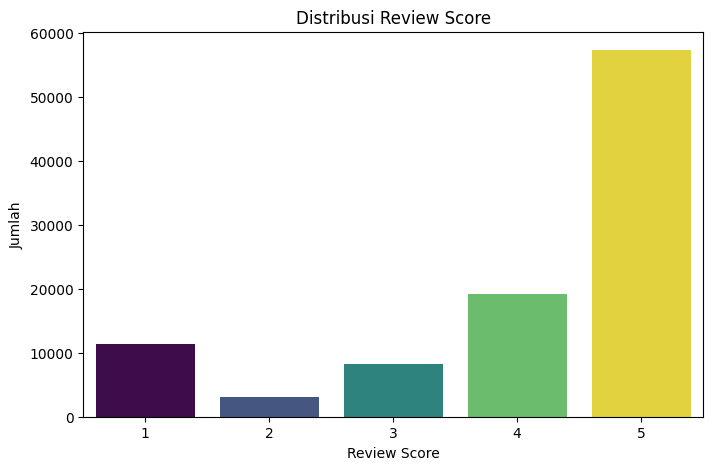

In [141]:
#Visualisasi distribusi review_score
plt.figure(figsize=(8, 5))
sns.countplot(x='review_score', data=reviews_df, hue='review_score', palette='viridis', legend=False)
plt.title('Distribusi Review Score')
plt.xlabel('Review Score')
plt.ylabel('Jumlah')
plt.show()

### Pertanyaan 2: 

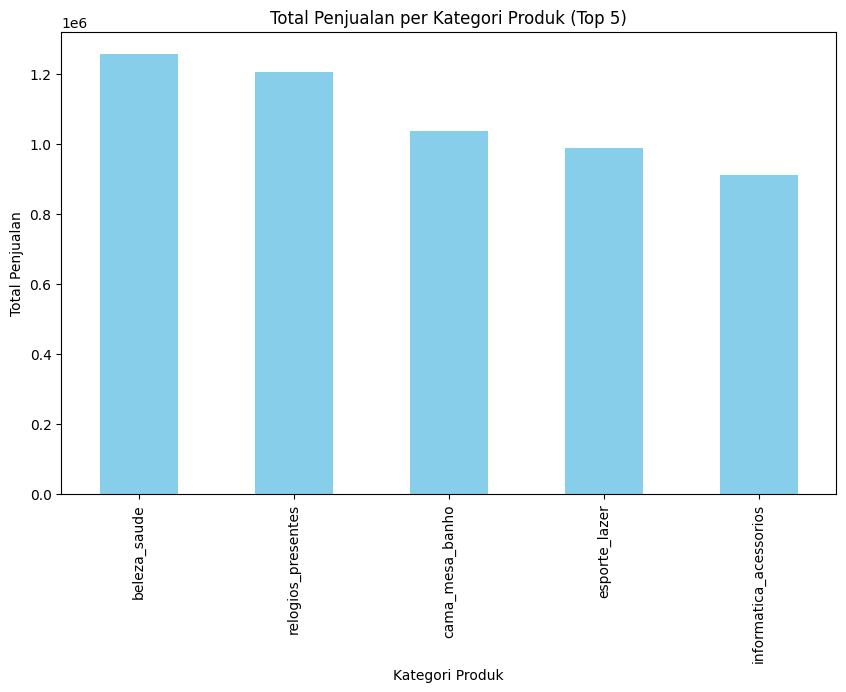

In [145]:
#Visualisasi
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Total Penjualan per Kategori Produk (Top 5)')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.show()

## RFM Analisis

## Conclusion

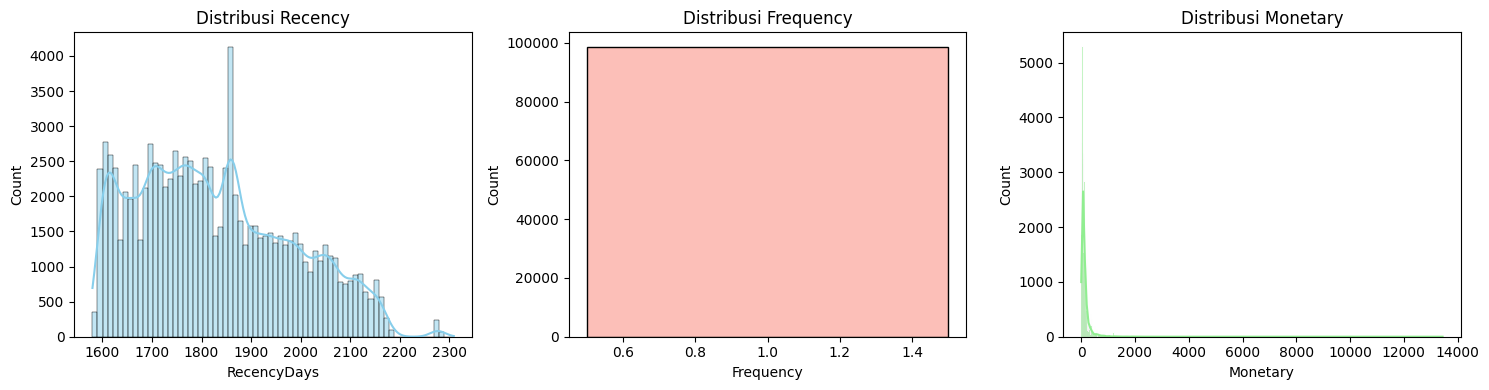


Statistik RFM:
        RecencyDays  Frequency      Monetary
count  98666.000000    98666.0  98666.000000
mean    1825.716072        1.0    137.754076
std      153.392934        0.0    210.645145
min     1580.000000        1.0      0.850000
25%     1702.000000        1.0     45.900000
50%     1807.000000        1.0     86.900000
75%     1936.000000        1.0    149.900000
max     2309.000000        1.0  13440.000000


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [179]:
#Membaca data pesanan dan item pesanan
orders_df = pd.read_csv('orders_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')

#Menggabungkan data pesanan dan item pesanan
merged_df = pd.merge(orders_df, order_items_df, on='order_id')

#Menghitung nilai Monetery (total pembelian) per pelanggan
rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': 'max',  # Recency
    'order_id': 'nunique',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

#Menghitung Recency dalam hari dari tanggal terakhir pembelian
rfm_df['recency_days'] = (pd.to_datetime('2023-01-01') - pd.to_datetime(rfm_df['order_purchase_timestamp'])).dt.days

#Mengganti nama kolom
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RecencyDays']

#Visualisasi Distribusi Recency, Frequency, Monetary
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['RecencyDays'], kde=True, color='skyblue')
plt.title('Distribusi Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], kde=True, color='salmon')
plt.title('Distribusi Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], kde=True, color='lightgreen')
plt.title('Distribusi Monetary')

plt.tight_layout()
plt.show()

#Keterangan
print("\nStatistik RFM:")
print(rfm_df[['RecencyDays', 'Frequency', 'Monetary']].describe())

#Menetapkan skor RFM
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
rfm_score = rfm_df.copy()

def recency_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

def frequency_monetary_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

rfm_score['RecencyScore'] = rfm_score['RecencyDays'].apply(recency_score, args=('RecencyDays', quantiles))
rfm_score['FrequencyScore'] = rfm_score['Frequency'].apply(frequency_monetary_score, args=('Frequency', quantiles))
rfm_score['MonetaryScore'] = rfm_score['Monetary'].apply(frequency_monetary_score, args=('Monetary', quantiles))

#Total RFM Score
rfm_score['TotalScore'] = rfm_score['RecencyScore'] + rfm_score['FrequencyScore'] + rfm_score['MonetaryScore']

#Analisis Segmentasi Pelanggan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_score, x='RecencyDays', y='Frequency', hue='TotalScore', palette='viridis', size='Monetary', sizes=(20, 200))
plt.title('Segmentasi Pelanggan berdasarkan RFM')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.legend(title='Total Score', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Keterangan
print("\nStatistik RFM Score:")
print(rfm_score[['RecencyScore', 'FrequencyScore', 'MonetaryScore', 'TotalScore']].describe())

- Conclution pertanyaan 1 : Rata-rata view score tingkat kepuasan pelanggan berada pada nilai 4.2 mencerminkan penilaian cukup positif, lalu median review score atau nilai tengah memberikan gambaran kepuasan pelanggan bahwa pelanggan memiliki pengalaman positif

- Conclution pertanyaan 2 : Total Penjualan per Kategori dapat diidentifikasi kategori produk yang menyumbang secara signifikan terhadap pendapatan, grafif batang juga menunjukkan kategori produk yang memiliki total penjualan tertinggi